# Assignment 1 - CS284A
### Richard Dubach
October 14, 2024

In [88]:
import numpy as np
import matplotlib.pyplot as plt

Iris data representsflowers classified by type of iris flower.  Iris classes include:
* Setosa
* Versicolor
* Virginica

Additional continuous data is included that can be used to predict the class:
* Sepal Length (cm): The length of the sepal.
* Sepal Width (cm): The width of the sepal.
* Petal Length (cm): The length of the petal.
* Petal Width (cm): The width of the petal.

In [89]:
# load the data
iris = np.genfromtxt("data/iris.txt",delimiter=None)

In [90]:
# split data into Iris class and predictor variables
Y = iris[:, -1]
X = iris[:,0:-1]

Flower class labels have been converted to numeric:

In [91]:
# Y

Predictive variables are in unlabelled columns:

In [92]:
# X

There are 148 data points with 4 features.

In [93]:
X.shape

(148, 4)

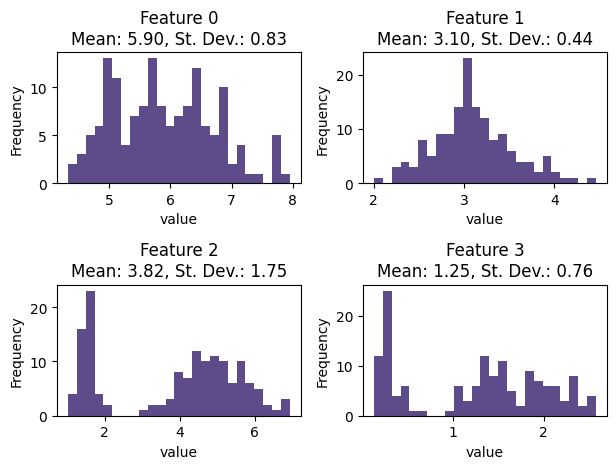

In [94]:
for i in range(X.shape[1]):
    plt.subplot(2,2,i+1)
    plt.hist(X[:,i], bins=25, color='#5E4B8A')
    mean = np.mean(X[:, i])
    std = np.std(X[:, i])
    
    plt.title(f"Feature {i}\nMean: {mean:.2f}, St. Dev.: {std:.2f}", fontsize=12)
    plt.xlabel('value')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()
    

From these plots we see that the first 2 features (Feature 0 and Feature 1 in the charts) have fairly normal distributions.

However the next 2 features (Feature 2 and 3) are bimodal, with gaps in the middle of the distributions.

There are no significant outliers.

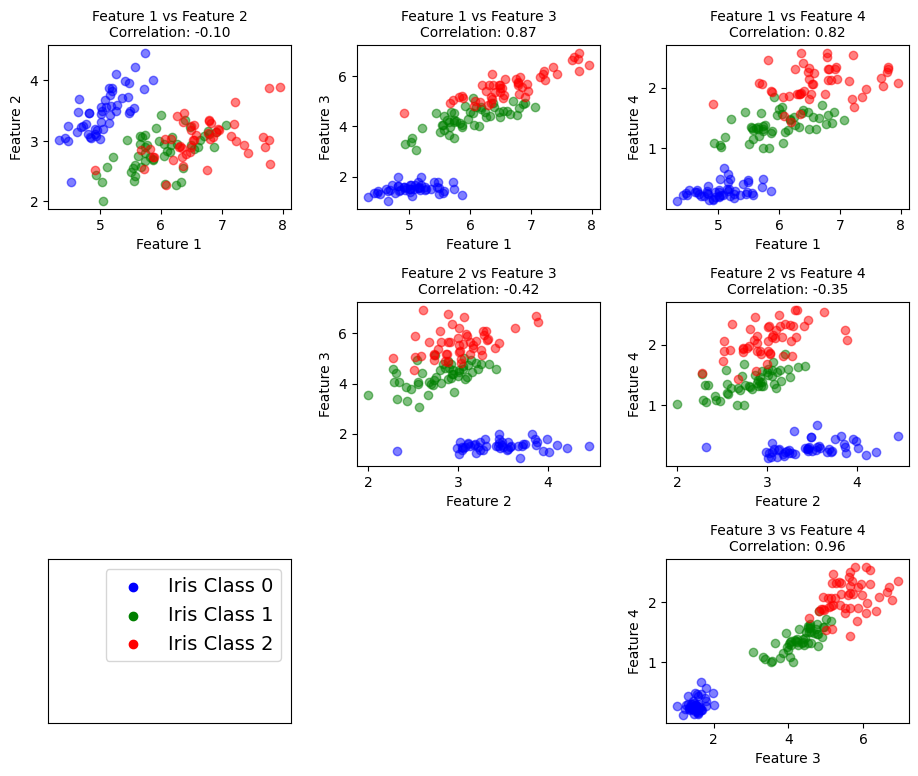

In [95]:
feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']
colors = {0: 'blue', 1: 'green', 2: 'red'}

plt.figure(figsize=(12, 10))

for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        if i < j:
            plt.subplot(4, 4, i * 4 + j + 1)
            
            for class_label, color in colors.items():
                plt.scatter(X[Y == class_label, i], X[Y == class_label, j], 
                            color=color, alpha=0.5, label=f'Class {class_label}')

            correlation = np.corrcoef(X[:, i], X[:, j])[0, 1]

            plt.title(f'{feature_names[i]} vs {feature_names[j]}\nCorrelation: {correlation:.2f}', fontsize=10)
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])

# Hacky way to show the legend once for all plots
plt.subplot(4,4,10)            
for class_label, color in colors.items():
    plt.scatter([], [], color=color, label=f'Iris Class {class_label}')
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()

Scatterplots show significant clustering by Iris flower class.  
* Features 1, 3, 4 are highly correlated, and also appear to be predictive of Iris class
* Feature 2 combines with features 3 and 4 to create clear clusters of Iris class
* Iris class 0 has very clear cluster, separate from other classes
     * Class 2 and 3 are also clustered, but have less distinct boundary 

# KNN Clustering Problem

In [96]:
import mltools as ml

# reload data to make notebook stateless
Y = iris[:, -1]
X = iris[:,0:-1]

# shuffle data before splitting into train and test
np.random.seed(43)
X,Y = ml.shuffleData(X,Y) 
X_small = X[:, [0,2]]
Xtr,Xva,Ytr,Yva = ml.splitData(X_small,Y, 0.75)

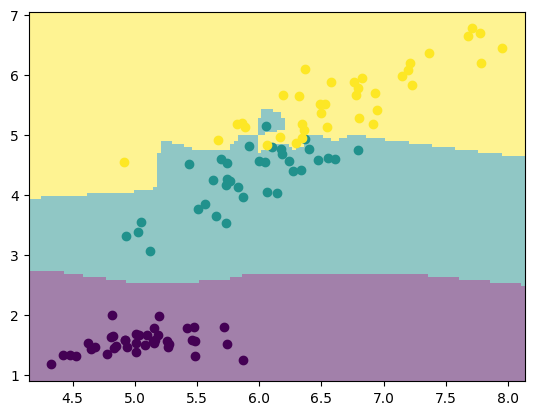

In [97]:
K = 1
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, K) 
YvaHat = knn.predict(Xva)
ml.plotClassify2D( knn, Xtr, Ytr )

## K=1
Model has perfect accuracy with K = 1.  The boundaries are pretty clean, but there are some unusual edges between yellow and green.

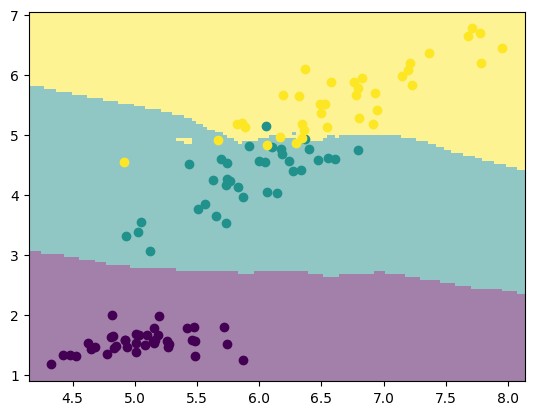

In [98]:
K = 10
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, K) 
YvaHat = knn.predict(Xva)
ml.plotClassify2D( knn, Xtr, Ytr )

## K=10
Model still appears fairly accurate, but we can see some clear errors.  Boundaries are cleanre, but still a little messy between yellow and green.

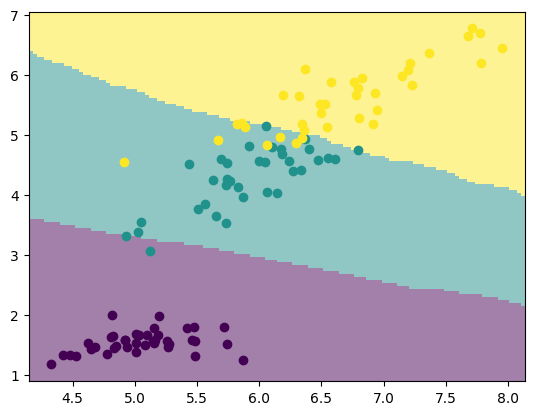

In [99]:
K = 50
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, K) 
YvaHat = knn.predict(Xva)
ml.plotClassify2D( knn, Xtr, Ytr )

## K=50
Boundaries are very clean, but the model is starting to lose some accuracy.  Visually, we can see a clear distinction between the cluster of purple and green points.  But we some some green points that are misclassified in the purple region, because K is getting too big.

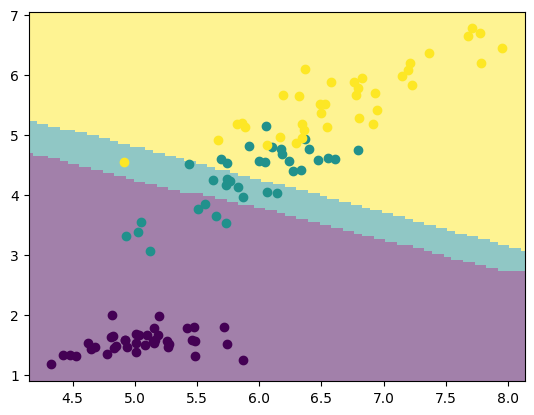

In [100]:
K = 100
knn = ml.knn.knnClassify()
knn.train(Xtr, Ytr, K) 
YvaHat = knn.predict(Xva)
ml.plotClassify2D( knn, Xtr, Ytr )

## K=100
Now we see a lot of errors, becausae of the very large K.  Notably, the green area has become very small, because these points are in the middle of the distribution and it is a very small area where the majority of the 100 nearest neighbors are green.  It is interesting that accuracy of the model varies by class.

### Part 2)

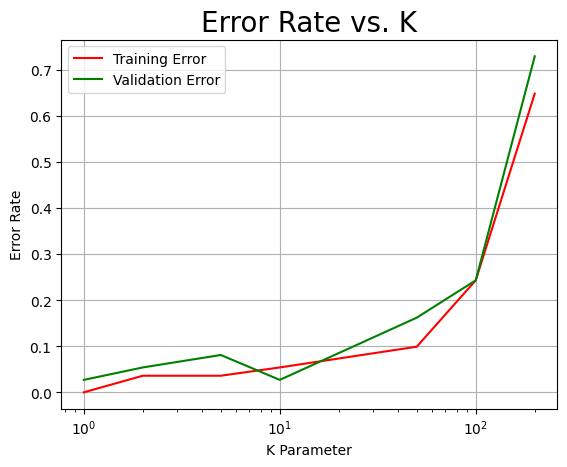

In [101]:
K=[1,2,5,10,50,100,200]
errTrain = np.zeros(len(K))
errValidate = np.zeros(len(K))

for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    learner.train(Xtr, Ytr, k)
    Yhat = learner.predict(Xtr)
    errTrain[i] = np.mean(Yhat != Ytr)
    Yhatva = learner.predict(Xva)
    errValidate[i] = np.mean(Yhatva != Yva)

plt.semilogx(K, errTrain, color='red', label='Training Error')
plt.semilogx(K, errValidate, color='green', label='Validation Error')

plt.title('Error Rate vs. K', fontsize=20)
plt.xlabel('K Parameter')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)

plt.show()
    

### Results
Based on this plot, I think the best value of K is 10.  

We expect low values of K to perform better on the training data than on the validation data, which is true here.  However the validation error rate is very low for K=1, and K=1 is tied with K=10 for the lowest validation error rates.  I am breaking the tie and choosing K=10 based on class lectures and prior knowledge.  I think it is common for low values of K to result in overfitting, and indeed the error rate is higher for K=2 and K=5 than it is at K=10.  K=10 is also the only K value for which the validation error rate is lower than the training error rate.  In general, I expect to see more of a U-shape in the validation error rates, so I choose K=10 over K=1.

In [102]:
errValidate

array([0.02702703, 0.05405405, 0.08108108, 0.02702703, 0.16216216,
       0.24324324, 0.72972973])

### Part 3)

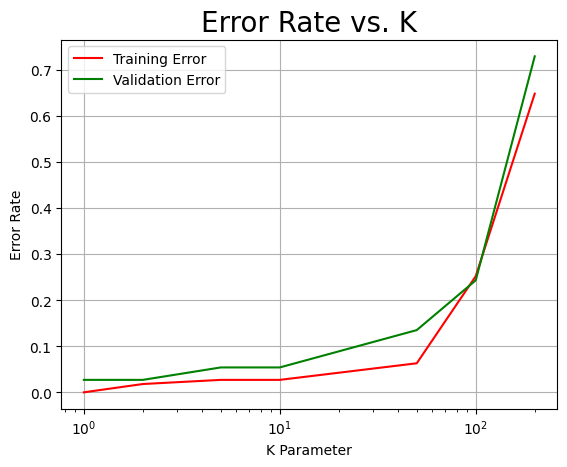

In [103]:
# Reset the data using all 4 features in X
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75)

K=[1,2,5,10,50,100,200]
errTrain = np.zeros(len(K))
errValidate = np.zeros(len(K))

for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    learner.train(Xtr, Ytr, k)
    Yhat = learner.predict(Xtr)
    errTrain[i] = np.mean(Yhat != Ytr)
    Yhatva = learner.predict(Xva)
    errValidate[i] = np.mean(Yhatva != Yva)

plt.semilogx(K, errTrain, color='red', label='Training Error')
plt.semilogx(K, errValidate, color='green', label='Validation Error')

plt.title('Error Rate vs. K', fontsize=20)
plt.xlabel('K Parameter')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)

plt.show()

#### Results
When using all data features, the plot looks fairly similar to the previous plot based only on 2 of the data features.  A notable difference is that the validation error is clearly smallest at K=1.  This does change my anser and I now think that K=1 is the best choice. 

## Statement of Collaboration
I did not discuss the details of this assignment with anyone from class, and I did not share or discuss code with anyone.  I followed the wuestions on Ed Discussion, but I did not finish the assignment in time to respond and participate in Ed Discussion.  